In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

# 0. Carga de los datos

In [3]:
import os 
ruta = os.getcwd()
print(ruta)

/Users/duman/Documents/universidad/7semestre/BI/BI-202302/Lab2


In [4]:
df_laptops_train = pd.read_csv('./data/laptop_data_train.csv', sep=',', encoding='utf-8')

In [5]:
df_laptops_train.shape

(1216, 14)

In [6]:
df_laptops_train.sample(5)

,id,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
682,864,Dell,Ultrabook,16,1.29,11.689792,1,0,276.053530,Intel Core i7,0.0,512,Intel,Windows
323,838,Lenovo,Notebook,4,1.50,9.759386,0,0,111.935204,Other Intel Processor,0.0,0,Intel,Others
884,349,Dell,Ultrabook,8,1.90,10.472336,0,0,141.211998,Intel Core i5,1000.0,0,AMD,Windows
1008,1009,HP,Notebook,4,1.64,10.503519,0,0,111.935204,Intel Core i3,500.0,0,Intel,Windows
717,724,MSI,Gaming,8,2.70,11.182294,0,0,127.335675,Intel Core i7,1000.0,128,Nvidia,Windows


In [7]:
df_laptops_unlabeled = pd.read_csv('./data/laptop_data_test_unlabeled.csv', sep=',', encoding='utf-8')

In [8]:
df_laptops_unlabeled.shape

(64, 14)

In [9]:
df_laptops_unlabeled.sample(5)

,id,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os,CalculatedPrice
7,460,Acer,Notebook,4,2.23,0,0,141.211998,Intel Core i3,1000.0,0,Nvidia,Windows,NaN
9,981,Toshiba,Notebook,4,1.20,0,0,165.632118,Intel Core i5,0.0,128,Intel,Windows,NaN
51,848,HP,2 in 1 Convertible,8,1.28,1,0,165.632118,Intel Core i5,0.0,256,Intel,Windows,NaN
20,1035,HP,Ultrabook,8,1.26,0,0,176.232574,Intel Core i7,0.0,256,Intel,Windows,NaN
11,568,Lenovo,Notebook,4,2.20,0,0,141.211998,Other Intel Processor,500.0,0,Intel,Windows,NaN


In [10]:
df_laptops_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1216 non-null   int64  
 1   Company      1216 non-null   object 
 2   TypeName     1216 non-null   object 
 3   Ram          1216 non-null   int64  
 4   Weight       1193 non-null   float64
 5   Price        1201 non-null   float64
 6   TouchScreen  1216 non-null   int64  
 7   Ips          1216 non-null   int64  
 8   Ppi          1204 non-null   float64
 9   Cpu_brand    1216 non-null   object 
 10  HDD          1200 non-null   float64
 11  SSD          1216 non-null   int64  
 12  Gpu_brand    1216 non-null   object 
 13  Os           1216 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory usage: 133.1+ KB


In [11]:
df_laptops_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216 entries, 0 to 1215
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1216 non-null   int64  
 1   Company      1216 non-null   object 
 2   TypeName     1216 non-null   object 
 3   Ram          1216 non-null   int64  
 4   Weight       1193 non-null   float64
 5   Price        1201 non-null   float64
 6   TouchScreen  1216 non-null   int64  
 7   Ips          1216 non-null   int64  
 8   Ppi          1204 non-null   float64
 9   Cpu_brand    1216 non-null   object 
 10  HDD          1200 non-null   float64
 11  SSD          1216 non-null   int64  
 12  Gpu_brand    1216 non-null   object 
 13  Os           1216 non-null   object 
dtypes: float64(4), int64(5), object(5)
memory usage: 133.1+ KB


# 1. Entendimiento y limpieza de los datos

In [12]:
# Eleccion de variables relevantes para calcular el precio de un computador
features = [
    'Company',
    'TypeName',
    'Ram',
    'Weight',
    'TouchScreen',
    'Ips',
    'Ppi',
    'Cpu_brand',
    'HDD',
    'SSD',
    'Gpu_brand',
    'Os'
]
featuresCategoricas = ['Company', 'TypeName', 'TouchScreen', 'Ips', 'Cpu_brand', 'Gpu_brand', 'Os']
featuresNumericas = ['Ram', 'Weight', 'Ppi', 'HDD', 'SSD']

# Eliminar variables no en features (id)
df_laptops_train = df_laptops_train[['Price'] + features]
df_laptops_unlabeled = df_laptops_unlabeled[features]


### 1.1. Verificacion de atributos de calidad de datos

#### Consistencia: Valores únicos en las variables categóricas

In [13]:
# verificar valores unicos en cada variable categorica
for feature in featuresCategoricas:
    print(f'{feature}: {df_laptops_train[feature].unique()}')

Company: ['Lenovo' 'Dell' 'HP' 'Asus' 'Toshiba' 'Acer' 'MSI' 'Razer' 'Samsung'
 'Chuwi' 'Microsoft' 'Mediacom' 'LG' 'Vero' 'Apple' 'Huawei' 'Xiaomi'
 'Fujitsu' 'Google']
TypeName: ['Notebook' 'Ultrabook' '2 in 1 Convertible' 'Gaming' 'Netbook'
 'Workstation' '2 in 1 Convertible%%' 'Gaming%%' '&&Notebook'
 '&&Ultrabook' 'Notebook%%' '&&Gaming' '&&2 in 1 Convertible']
TouchScreen: [0 1]
Ips: [0 1]
Cpu_brand: ['Intel Core i3' 'Intel Core i5' 'Intel Core i7' 'AMD Processor'
 'Other Intel Processor']
Gpu_brand: ['Intel' 'Nvidia' 'AMD' 'Intel%%' 'Nvidia%%' '&&Intel' '&&Nvidia' 'AMD%%'
 '&&AMD']
Os: ['Others' 'Windows' 'Mac']


**Resultados:** Se puede observar que las variables 'TypeName' y 'Gpu_brand' tienen valores con caracteres extraños. Se procederá a eliminarlos para corregir esta información.

In [14]:
# Eliminar caracteres "&&", "%%", en las variables categoricas 'TypeName' y 'Gpu_brand'
df_laptops_train['TypeName'] = df_laptops_train['TypeName'].str.replace('&&', '').str.replace('%%', '')
df_laptops_train['Gpu_brand'] = df_laptops_train['Gpu_brand'].str.replace('%%', '').str.replace('&&', '')


In [15]:
# verificar valores unicos en cada variable categorica de datos de test
for feature in featuresCategoricas:
    print(f'{feature}: {df_laptops_unlabeled[feature].unique()}')
    

Company: ['HP' 'Lenovo' 'MSI' 'Asus' 'Acer' 'Toshiba' 'Dell' 'Mediacom']
TypeName: ['Notebook' 'Gaming' 'Ultrabook' '2 in 1 Convertible' 'Netbook'
 '&&Notebook']
TouchScreen: [0 1]
Ips: [0 1]
Cpu_brand: ['Intel Core i3' 'Intel Core i5' 'Intel Core i7' 'Other Intel Processor'
 'AMD Processor']
Gpu_brand: ['Intel' 'Nvidia' 'AMD']
Os: ['Windows' 'Others']


In [16]:
# Eliminar caracteres "&&", "%%", en las variables categoricas 'TypeName' y 'Gpu_brand' de datos de test
df_laptops_unlabeled['TypeName'] = df_laptops_unlabeled['TypeName'].str.replace('&&', '').str.replace('%%', '')
df_laptops_unlabeled['Gpu_brand'] = df_laptops_unlabeled['Gpu_brand'].str.replace('%%', '').str.replace('&&', '')

In [17]:
#Verificación de valores unicos en cada variable categorica luego de eliminar caracteres "&&", "%%"
for feature in featuresCategoricas:
    print(f'{feature}: {df_laptops_train[feature].unique()}')

Company: ['Lenovo' 'Dell' 'HP' 'Asus' 'Toshiba' 'Acer' 'MSI' 'Razer' 'Samsung'
 'Chuwi' 'Microsoft' 'Mediacom' 'LG' 'Vero' 'Apple' 'Huawei' 'Xiaomi'
 'Fujitsu' 'Google']
TypeName: ['Notebook' 'Ultrabook' '2 in 1 Convertible' 'Gaming' 'Netbook'
 'Workstation']
TouchScreen: [0 1]
Ips: [0 1]
Cpu_brand: ['Intel Core i3' 'Intel Core i5' 'Intel Core i7' 'AMD Processor'
 'Other Intel Processor']
Gpu_brand: ['Intel' 'Nvidia' 'AMD']
Os: ['Others' 'Windows' 'Mac']


In [18]:
# Verificar valores unicos en cada variable categorica de datos de test luego de eliminar caracteres "&&", "%%"
for feature in featuresCategoricas:
    print(f'{feature}: {df_laptops_unlabeled[feature].unique()}')

Company: ['HP' 'Lenovo' 'MSI' 'Asus' 'Acer' 'Toshiba' 'Dell' 'Mediacom']
TypeName: ['Notebook' 'Gaming' 'Ultrabook' '2 in 1 Convertible' 'Netbook']
TouchScreen: [0 1]
Ips: [0 1]
Cpu_brand: ['Intel Core i3' 'Intel Core i5' 'Intel Core i7' 'Other Intel Processor'
 'AMD Processor']
Gpu_brand: ['Intel' 'Nvidia' 'AMD']
Os: ['Windows' 'Others']


Se corrigieron los valores con caracteres extraños.

In [19]:
# Función que compara la cantidad de valores únicos en cada variable categorica entre los datos de entrenamiento y los datos de test
def compararValoresUnicos(df_train, df_test, featuresCategoricas):
    for feature in featuresCategoricas:
        print(f'{feature}: {df_train[feature].unique()}')
        print(f'{feature}: {df_test[feature].unique()}')
        print(f'{feature}: {df_train[feature].unique().shape}')
        print(f'{feature}: {df_test[feature].unique().shape}')
        print('------------------------')

compararValoresUnicos(df_laptops_train, df_laptops_unlabeled, featuresCategoricas)
    

Company: ['Lenovo' 'Dell' 'HP' 'Asus' 'Toshiba' 'Acer' 'MSI' 'Razer' 'Samsung'
 'Chuwi' 'Microsoft' 'Mediacom' 'LG' 'Vero' 'Apple' 'Huawei' 'Xiaomi'
 'Fujitsu' 'Google']
Company: ['HP' 'Lenovo' 'MSI' 'Asus' 'Acer' 'Toshiba' 'Dell' 'Mediacom']
Company: (19,)
Company: (8,)
------------------------
TypeName: ['Notebook' 'Ultrabook' '2 in 1 Convertible' 'Gaming' 'Netbook'
 'Workstation']
TypeName: ['Notebook' 'Gaming' 'Ultrabook' '2 in 1 Convertible' 'Netbook']
TypeName: (6,)
TypeName: (5,)
------------------------
TouchScreen: [0 1]
TouchScreen: [0 1]
TouchScreen: (2,)
TouchScreen: (2,)
------------------------
Ips: [0 1]
Ips: [0 1]
Ips: (2,)
Ips: (2,)
------------------------
Cpu_brand: ['Intel Core i3' 'Intel Core i5' 'Intel Core i7' 'AMD Processor'
 'Other Intel Processor']
Cpu_brand: ['Intel Core i3' 'Intel Core i5' 'Intel Core i7' 'Other Intel Processor'
 'AMD Processor']
Cpu_brand: (5,)
Cpu_brand: (5,)
------------------------
Gpu_brand: ['Intel' 'Nvidia' 'AMD']
Gpu_brand: ['Intel' 

Se puede observar que el dataset de entrenamiento tiene más valores únicos en varias categorías que el dataset de prueba. Se procede a eliminar los valores únicos del dataset de entrenamiento que no se encuentran en el dataset de prueba. 

#### Completitud: Revisar valores nulos

In [20]:
# Revisión del porcentaje de valores nulos (vacíos) en cada columna

df_laptops_train[['Price']+ features].isnull().sum() / df_laptops_train.shape[0]

Price          0.012336
Company        0.000000
TypeName       0.000000
Ram            0.000000
Weight         0.018914
TouchScreen    0.000000
Ips            0.000000
Ppi            0.009868
Cpu_brand      0.000000
HDD            0.013158
SSD            0.000000
Gpu_brand      0.000000
Os             0.000000
dtype: float64

In [21]:
# Eliminar entradas con datos vacíos
# Antes de realizar el drop, se genera un informe con los datos que se van a eliminar
# .isnull() es igual a .isna()
entradas_a_eliminar = df_laptops_train[df_laptops_train[['Price']+ features].isna().any(axis=1)]
entradas_a_eliminar.to_csv('./data/entradas_a_eliminar.csv', sep=',', encoding='utf-8', index=False)

#conocer entradas eliminadas
entradas_a_eliminar.shape

(46, 13)

In [22]:
# Eliminar entradas con datos vacíos
df_laptops_train = df_laptops_train.dropna(subset=['Price']+ features)
df_laptops_test_unlabeled = df_laptops_unlabeled.dropna(subset=features)

In [23]:
df_laptops_train.shape

(1170, 13)

In [24]:
df_laptops_test_unlabeled.shape

(63, 12)

In [25]:
df_laptops_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1170 entries, 0 to 1215
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        1170 non-null   float64
 1   Company      1170 non-null   object 
 2   TypeName     1170 non-null   object 
 3   Ram          1170 non-null   int64  
 4   Weight       1170 non-null   float64
 5   TouchScreen  1170 non-null   int64  
 6   Ips          1170 non-null   int64  
 7   Ppi          1170 non-null   float64
 8   Cpu_brand    1170 non-null   object 
 9   HDD          1170 non-null   float64
 10  SSD          1170 non-null   int64  
 11  Gpu_brand    1170 non-null   object 
 12  Os           1170 non-null   object 
dtypes: float64(4), int64(4), object(5)
memory usage: 128.0+ KB


In [26]:
df_laptops_unlabeled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      64 non-null     object 
 1   TypeName     64 non-null     object 
 2   Ram          64 non-null     int64  
 3   Weight       63 non-null     float64
 4   TouchScreen  64 non-null     int64  
 5   Ips          64 non-null     int64  
 6   Ppi          64 non-null     float64
 7   Cpu_brand    64 non-null     object 
 8   HDD          64 non-null     float64
 9   SSD          64 non-null     int64  
 10  Gpu_brand    64 non-null     object 
 11  Os           64 non-null     object 
dtypes: float64(3), int64(4), object(5)
memory usage: 6.1+ KB


In [27]:
# Revisión del porcentaje de valores nulos (vacíos) en cada columna luego de eliminar entradas con datos vacíos
df_laptops_train[['Price']+ features].isnull().sum() / df_laptops_train.shape[0]

Price          0.0
Company        0.0
TypeName       0.0
Ram            0.0
Weight         0.0
TouchScreen    0.0
Ips            0.0
Ppi            0.0
Cpu_brand      0.0
HDD            0.0
SSD            0.0
Gpu_brand      0.0
Os             0.0
dtype: float64

In [28]:
# Revision del porcentaje de valores nulos (vacíos) en cada columna luego de eliminar entradas con datos vacíos en datos unlabeled
df_laptops_test_unlabeled[features].isnull().sum() / df_laptops_test_unlabeled.shape[0]

Company        0.0
TypeName       0.0
Ram            0.0
Weight         0.0
TouchScreen    0.0
Ips            0.0
Ppi            0.0
Cpu_brand      0.0
HDD            0.0
SSD            0.0
Gpu_brand      0.0
Os             0.0
dtype: float64

#### Unicidad: Entradas iguales en todas sus variables

In [29]:
# Unicidad de los datos de entrenamiento
entradas_duplicadas_train = df_laptops_train[df_laptops_train.duplicated()]
len(entradas_duplicadas_train)

4

In [30]:
# Unicidad de los datos no etiquetados
entradas_duplicadas_unlabeled = df_laptops_test_unlabeled[df_laptops_test_unlabeled.duplicated()]
len(entradas_duplicadas_unlabeled)

0

In [31]:
# Eliminar entradas duplicadas en datos de entrenamiento. 
# No se encontraron duplicados en datos unlabeled
df_laptops_train = df_laptops_train.drop_duplicates()


In [32]:
# Revisión de entradas duplicadas luego de eliminarlas
entradas_duplicadas = df_laptops_train[df_laptops_train.duplicated()]
len(entradas_duplicadas)

0

#### Validez: Rango lógico y formato correcto de valores en variables numéricas

In [33]:
# Revisar la validez de los datos de las variables numericas y la variable price en el dataset de entrenamiento
df_laptops_train[featuresNumericas + ['Price']].describe()


,Ram,Weight,Ppi,HDD,SSD,Price
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,8.507719,2.132753,151.778302,414.802744,187.989708,12.385126
std,5.136040,2.882080,181.493944,517.624081,187.302367,24.476793
min,2.000000,0.690000,90.583402,0.000000,0.000000,9.134616
25%,4.000000,1.500000,127.335675,0.000000,0.000000,10.402328
50%,8.000000,2.040000,141.211998,0.000000,256.000000,10.882316
75%,8.000000,2.310000,157.350512,1000.000000,256.000000,11.288115
max,64.000000,97.729949,6170.032609,2000.000000,1024.000000,499.766079


Encontramos valores atípicos para las variables Weight y Ppi. Procedemos a reemplazarlos por la mediana.

In [34]:
# Revisamos la cantidad de valores atípicos que tiene la variable Ppi, estos son los mayores a 400. 
df_valores_atipicos_ppi = df_laptops_train[df_laptops_train['Ppi'] > 400]
df_valores_atipicos_ppi

,Price,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
364,10.50498,Lenovo,Notebook,4,2.05,0,0,6170.032609,Intel Core i5,500.0,0,Intel,Windows


In [35]:
# Los reemplazamos con la mediana
df_laptops_train.loc[df_laptops_train['Ppi'] > 400, 'Ppi'] = df_laptops_train['Ppi'].median()

In [36]:
# Volvemos a revisar la cantidad de valores atípicos que tiene la variable Ppi, estos son los mayores a 400.
df_valores_atipicos_ppi = df_laptops_train[df_laptops_train['Ppi'] > 400]
len(df_valores_atipicos_ppi)

0

In [37]:
# Mismo proceso con la variabale Weight
df_valores_atipicos_weight = df_laptops_train[df_laptops_train['Weight'] > 5]
df_valores_atipicos_weight

,Price,Company,TypeName,Ram,Weight,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
633,10.565862,Dell,Notebook,8,97.729949,0,0,141.211998,Intel Core i5,0.0,256,AMD,Windows


In [38]:
# Reemplazamos los valores atípicos con la mediana
df_laptops_train.loc[df_laptops_train['Weight'] > 5, 'Weight'] = df_laptops_train['Weight'].median()
# Volvemos a revisar la cantidad de valores atípicos que tiene la variable Weight, estos son los mayores a 5.
len(df_laptops_train[df_laptops_train['Weight'] > 5])

0

In [39]:
# Ahora el mismo proceso con los datos en el archivo unlabeled
df_laptops_test_unlabeled[featuresNumericas].describe()

,Ram,Weight,Ppi,HDD,SSD
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,8.507937,2.002857,154.883423,500.000000,164.190476
std,5.423584,0.618170,51.980062,575.017531,184.184240
min,2.000000,0.690000,90.583402,0.000000,0.000000
25%,4.000000,1.550000,127.335675,0.000000,0.000000
50%,8.000000,2.020000,141.211998,0.000000,128.000000
75%,8.000000,2.265000,161.491315,1000.000000,256.000000
max,32.000000,4.300000,316.965060,2000.000000,1000.000000


In [40]:
# Reemplazamos los valores atipicos con la mediana
df_laptops_test_unlabeled.loc[df_laptops_test_unlabeled['Ppi'] > 400, 'Ppi'] = df_laptops_test_unlabeled['Ppi'].median()

Volvemos a comprobar los datos de las variables numericas y la variable price para comprobar que no hayan valores atipicos


In [41]:
df_laptops_train[featuresNumericas + ['Price']].describe()

,Ram,Weight,Ppi,HDD,SSD,Price
count,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,8.507719,2.050686,146.607787,414.802744,187.989708,12.385126
std,5.136040,0.674661,42.705848,517.624081,187.302367,24.476793
min,2.000000,0.690000,90.583402,0.000000,0.000000,9.134616
25%,4.000000,1.500000,127.335675,0.000000,0.000000,10.402328
50%,8.000000,2.040000,141.211998,0.000000,256.000000,10.882316
75%,8.000000,2.310000,157.350512,1000.000000,256.000000,11.288115
max,64.000000,4.700000,352.465147,2000.000000,1024.000000,499.766079


In [42]:
df_laptops_test_unlabeled[featuresNumericas].describe()

,Ram,Weight,Ppi,HDD,SSD
count,63.000000,63.000000,63.000000,63.000000,63.000000
mean,8.507937,2.002857,154.883423,500.000000,164.190476
std,5.423584,0.618170,51.980062,575.017531,184.184240
min,2.000000,0.690000,90.583402,0.000000,0.000000
25%,4.000000,1.550000,127.335675,0.000000,0.000000
50%,8.000000,2.020000,141.211998,0.000000,128.000000
75%,8.000000,2.265000,161.491315,1000.000000,256.000000
max,32.000000,4.300000,316.965060,2000.000000,1000.000000


In [ ]:
# Revisar la cantidad de registros por valor en cada variable categorica
for feature in featuresCategoricas:
    print("Data train")
    print(f'{feature}: {df_laptops_train[feature].value_counts()}')
    print('------------------------')
    

### Output del archivo actual

In [263]:
nombre_archivo = 'df_laptops_train_output1.csv'
df_laptops_train.to_csv('./data/' + nombre_archivo, sep=',', encoding='utf-8', index=False)
nombre_archivo_unlabeled = 'df_laptops_test_unlabeled_output1.csv'
df_laptops_test_unlabeled.to_csv('./data/' + nombre_archivo_unlabeled, sep=',', encoding='utf-8', index=False)

#####

# 2. Búsqueda de relaciones entre variables

In [43]:
# Revisar valores unicos en cada variable categorica
for feature in featuresCategoricas:
    print(f'{feature}: {df_laptops_test_unlabeled[feature].unique()}')

Company: ['HP' 'Lenovo' 'MSI' 'Asus' 'Acer' 'Toshiba' 'Dell' 'Mediacom']
TypeName: ['Notebook' 'Gaming' 'Ultrabook' '2 in 1 Convertible' 'Netbook']
TouchScreen: [0 1]
Ips: [0 1]
Cpu_brand: ['Intel Core i3' 'Intel Core i5' 'Intel Core i7' 'Other Intel Processor'
 'AMD Processor']
Gpu_brand: ['Intel' 'Nvidia' 'AMD']
Os: ['Windows' 'Others']


In [324]:
# Transformar variables categoricas a numericas usando OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)


In [335]:
# Ajustar el encoder con los datos de entrenamiento
df_encoded_train = ohe.fit_transform(df_laptops_train[featuresCategoricas])

# Ajustar el encoder con los datos no etiquetados
df_encoded_unlabeled = ohe.transform(df_laptops_test_unlabeled[featuresCategoricas])

In [336]:
# Convertir los resultados en DataFrame
df_encoded_train = pd.DataFrame(df_encoded_train, columns=ohe.get_feature_names_out(featuresCategoricas))
df_encoded_unlabeled = pd.DataFrame(df_encoded_unlabeled, columns=ohe.get_feature_names_out(featuresCategoricas))

In [337]:
# Revisar el resultado
# df_encoded_train.head()
df_encoded_unlabeled.head()


,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,TouchScreen_1,Ips_1,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Others,Os_Windows
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [339]:
# back up de los datos de entrenamiento y no etiquetados
df_laptops_train_backup = df_laptops_train.copy()
df_laptops_test_unlabeled_backup = df_laptops_test_unlabeled.copy()

# Volver a back up de los datos de entrenamiento y no etiquetados
#df_laptops_train = df_laptops_train_backup.copy()
#df_laptops_test_unlabeled = df_laptops_test_unlabeled_backup.copy()

In [340]:
# Concatenar los datos numericos con los datos categoricos codificados

# Resetear los indices de los dataframes de datos etiquetados
df_laptops_train = df_laptops_train.reset_index(drop=True)
df_encoded_train = df_encoded_train.reset_index(drop=True)
# Concatenar los dataframes
df_laptops_train_copy = pd.concat([df_laptops_train.drop(featuresCategoricas, axis=1), df_encoded_train], axis=1)

# Resetear los indices de los dataframes de datos no etiquetados
df_laptops_test_unlabeled = df_laptops_test_unlabeled.reset_index(drop=True)
df_encoded_unlabeled = df_encoded_unlabeled.reset_index(drop=True)
# Concatenar los dataframes
df_laptops_test_unlabeled_copy = pd.concat([df_laptops_test_unlabeled.drop(featuresCategoricas, axis=1), df_encoded_unlabeled], axis=1)


#df_laptops_train = pd.concat([df_laptops_train.drop(featuresCategoricas, axis=1), df_encoded_train], axis=1)
#df_laptops_test_unlabeled = pd.concat([df_laptops_test_unlabeled.drop(featuresCategoricas, axis=1), df_encoded_test], axis=1)


In [341]:
# Verificar que no hayan valores nulos en los datos de entrenamiento
rows_with_nan = df_laptops_train_copy[df_laptops_train_copy.isnull().any(axis=1)]
rows_with_nan


,Price,Ram,Weight,Ppi,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,TouchScreen_1,Ips_1,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Others,Os_Windows


In [342]:
df_laptops_train_copy.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1166 entries, 0 to 1165

Data columns (total 39 columns):

 #   Column                           Non-Null Count  Dtype  

---  ------                           --------------  -----  

 0   Price                            1166 non-null   float64

 1   Ram                              1166 non-null   int64  

 2   Weight                           1166 non-null   float64

 3   Ppi                              1166 non-null   float64

 4   HDD                              1166 non-null   float64

 5   SSD                              1166 non-null   int64  

 6   Company_Apple                    1166 non-null   float64

 7   Company_Asus                     1166 non-null   float64

 8   Company_Chuwi                    1166 non-null   float64

 9   Company_Dell                     1166 non-null   float64

 10  Company_Fujitsu                  1166 non-null   float64

 11  Company_Google                   1166 non-null   float64

 12  Com

In [343]:
df_laptops_test_unlabeled_copy.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 63 entries, 0 to 62

Data columns (total 38 columns):

 #   Column                           Non-Null Count  Dtype  

---  ------                           --------------  -----  

 0   Ram                              63 non-null     int64  

 1   Weight                           63 non-null     float64

 2   Ppi                              63 non-null     float64

 3   HDD                              63 non-null     float64

 4   SSD                              63 non-null     int64  

 5   Company_Apple                    63 non-null     float64

 6   Company_Asus                     63 non-null     float64

 7   Company_Chuwi                    63 non-null     float64

 8   Company_Dell                     63 non-null     float64

 9   Company_Fujitsu                  63 non-null     float64

 10  Company_Google                   63 non-null     float64

 11  Company_HP                       63 non-null     float64

 12  Company

#### Se comprueba el supuesto de correlación entre las variables independientes numéricas.
Se acepta un nivel de correlación menor a ~$|0.8|$.

,Ram,Weight,Ppi,HDD,SSD
Ram,1.000000,0.401434,0.290125,0.088890,0.596536
Weight,0.401434,1.000000,-0.314977,0.510444,-0.049636
Ppi,0.290125,-0.314977,1.000000,-0.298250,0.501579
HDD,0.088890,0.510444,-0.298250,1.000000,-0.403111
SSD,0.596536,-0.049636,0.501579,-0.403111,1.000000


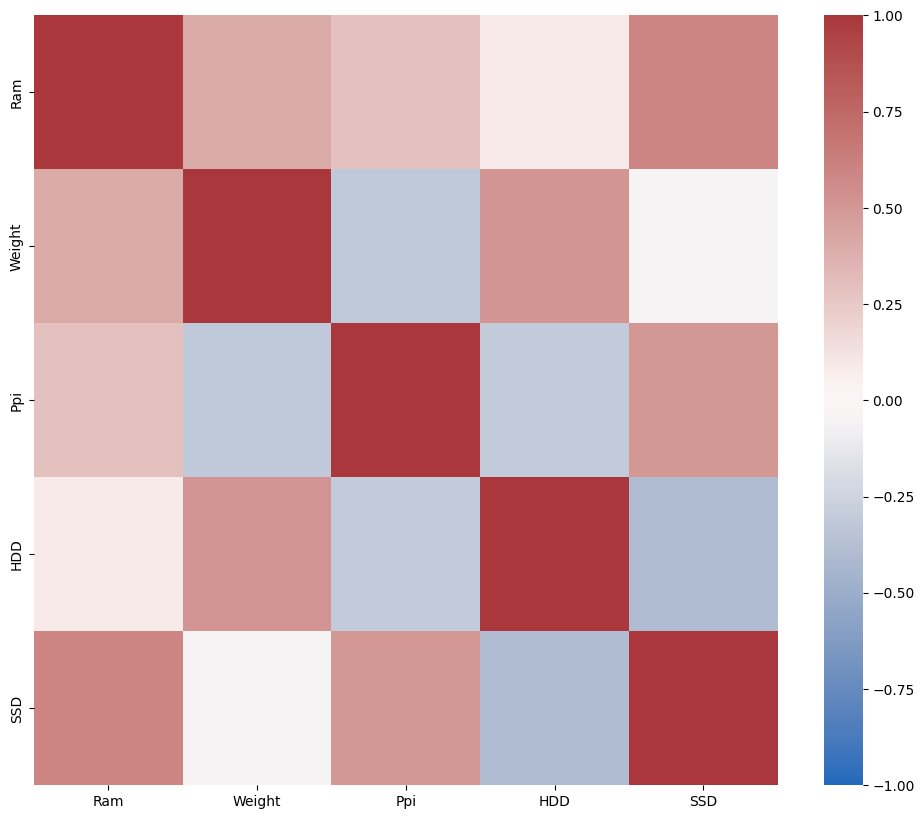

In [291]:

# Correlacion entre variables numericas
plt.figure(figsize = (12, 10))
sns.heatmap(df_laptops_train[featuresNumericas].corr(), cmap = 'vlag', vmin = -1, vmax = 1)
df_laptops_train[featuresNumericas].corr()


Se verifica efectivamente, que no existe correlación entre las variables numericas.

#### Normalización de las variables

In [344]:
scaler = StandardScaler()

# Ajustar el scaler con los datos de entrenamiento
scaler.fit(df_laptops_train_copy[featuresNumericas])

StandardScaler()

In [345]:
### Warning ###
# Backup de los datos de entrenamiento y test
df_laptops_train_copy_backup = df_laptops_train_copy.copy()
df_laptops_test_unlabeled_copy_backup = df_laptops_test_unlabeled_copy.copy()


In [346]:
# vistazo al backup si hay valores nulos
rows_with_nan = df_laptops_train_copy_backup[df_laptops_train_copy_backup.isnull().any(axis=1)]
rows_with_nan


,Price,Ram,Weight,Ppi,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,TouchScreen_1,Ips_1,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Others,Os_Windows


In [347]:
# Transformar los conjuntos de datos
df_laptops_train_copy[featuresNumericas] = scaler.transform(df_laptops_train_copy[featuresNumericas])
df_laptops_test_unlabeled_copy[featuresNumericas] = scaler.transform(df_laptops_test_unlabeled_copy[featuresNumericas])


In [348]:
df_laptops_train_copy.head()

,Price,Ram,Weight,Ppi,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,TouchScreen_1,Ips_1,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Others,Os_Windows
0,10.084809,-0.878041,-0.223447,-1.081185,0.164664,-1.004100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,10.563111,-0.098897,-0.104818,-0.126402,1.131030,-1.004100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,11.064804,-0.098897,-1.172478,0.693992,-0.801703,0.363260,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,10.977717,0.680248,0.310384,-0.126402,3.063763,1.730621,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,11.550633,-0.098897,-1.246621,4.325770,-0.801703,0.363260,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [349]:
# Revisar el resultado
df_laptops_train_copy.describe()

,Price,Ram,Weight,Ppi,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,TouchScreen_1,Ips_1,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Others,Os_Windows
count,1166.000000,1.166000e+03,1.166000e+03,1.166000e+03,1.166000e+03,1.166000e+03,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000,1166.000000
mean,12.385126,-1.553931e-16,-2.071908e-16,-3.656309e-17,1.828155e-17,2.437539e-17,0.018010,0.117496,0.001715,0.229846,0.002573,0.002573,0.206690,0.001715,0.001715,0.229846,0.041166,0.005146,0.005146,0.006003,0.006861,0.037736,0.003431,0.003431,0.164666,0.016295,0.552316,0.151801,0.024014,0.143225,0.283019,0.107204,0.325901,0.413379,0.105489,0.546312,0.316467,0.118353,0.863636
std,24.476793,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,0.133045,0.322148,0.041398,0.420914,0.050680,0.050680,0.405105,0.041398,0.041398,0.420914,0.198760,0.071580,0.071580,0.077282,0.082582,0.190638,0.058495,0.058495,0.371038,0.126662,0.497469,0.358982,0.153157,0.350452,0.450659,0.309505,0.468911,0.492651,0.307314,0.498064,0.465297,0.323165,0.343322
min,9.134616,-1.267613e+00,-2.017709e+00,-1.312430e+00,-8.017029e-01,-1.004100e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.402328,-8.780408e-01,-8.165913e-01,-4.514694e-01,-8.017029e-01,-1.004100e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,10.882316,-9.889653e-02,-1.584602e-02,-1.264020e-01,-8.017029e-01,3.632601e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,11.288115,-9.889653e-02,3.845266e-01,2.516596e-01,1.131030e+00,3.632601e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,499.766079,1.080912e+01,3.928566e+00,4.822424e+00,3.063763e+00,4.465341e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [350]:
# Revisar unicamente columna Price
df_laptops_train_copy['Price'].describe()

count    1166.000000
mean       12.385126
std        24.476793
min         9.134616
25%        10.402328
50%        10.882316
75%        11.288115
max       499.766079
Name: Price, dtype: float64

# 3. Construcción de modelo de regresión

In [380]:
featuresActualizadas = list(df_laptops_train_copy.columns)
x_train = df_laptops_train_copy.drop('Price', axis=1)
y_train = df_laptops_train_copy['Price']

X_train, X_test, y_train, y_test = train_test_split(df_laptops_train_copy[featuresActualizadas], df_laptops_train_copy['Price'], test_size = 0.3, random_state = 1)

In [381]:
# Mostrar filas con valores nulos
X_train[X_train.isnull().any(axis=1)]


,Price,Ram,Weight,Ppi,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,TouchScreen_1,Ips_1,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,Os_Others,Os_Windows


In [382]:
regression = LinearRegression()

In [383]:
# revision de valores NaN existentes en el dataset
X_train.isnull().sum()


Price                              0
Ram                                0
Weight                             0
Ppi                                0
HDD                                0
SSD                                0
Company_Apple                      0
Company_Asus                       0
Company_Chuwi                      0
Company_Dell                       0
Company_Fujitsu                    0
Company_Google                     0
Company_HP                         0
Company_Huawei                     0
Company_LG                         0
Company_Lenovo                     0
Company_MSI                        0
Company_Mediacom                   0
Company_Microsoft                  0
Company_Razer                      0
Company_Samsung                    0
Company_Toshiba                    0
Company_Vero                       0
Company_Xiaomi                     0
TypeName_Gaming                    0
TypeName_Netbook                   0
TypeName_Notebook                  0
T

In [384]:
regression.fit(X_train, y_train)

LinearRegression()

### 3.1. Interpretación de los coeficientes y el intercepto

In [385]:
pd.DataFrame(regression.coef_, index=X_train.columns, columns=['Coeficiente'])

,Coeficiente
Price,1.000000e+00
Ram,-1.098989e-16
Weight,2.032043e-16
Ppi,8.181341e-18
HDD,-5.168877e-17
SSD,-1.539613e-16
Company_Apple,-8.501375e-16
Company_Asus,-1.537293e-17
Company_Chuwi,-1.311687e-16
Company_Dell,2.634438e-16


In [386]:
regression.intercept_

5.329070518200751e-15

<Axes: >

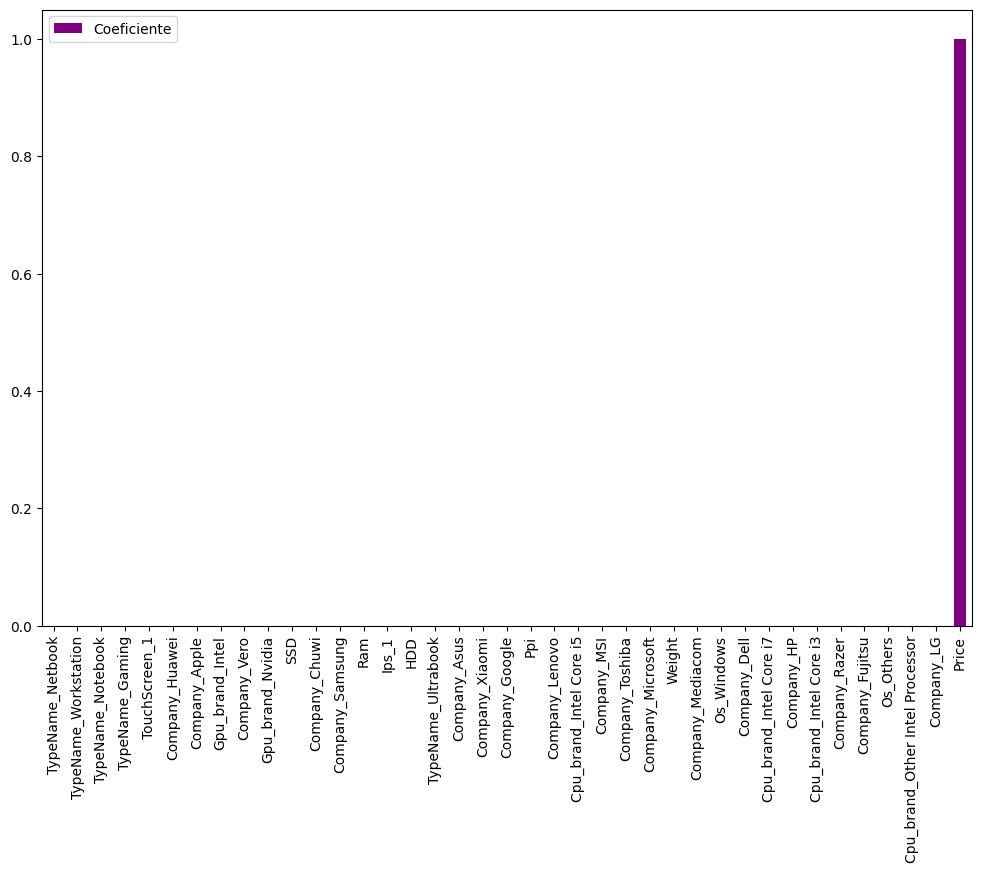

In [387]:

# Gráfico de barras de los coeficientes ordenados de mayor a menor
pd.DataFrame(regression.coef_, index=X_train.columns, columns=['Coeficiente']).sort_values(by='Coeficiente').plot(kind='bar', figsize=(12, 8), color='purple')


In [388]:
# Prueba de significancia individual de las variables. 
# Se utiliza el p-value para determinar si la variable es significativa o no
# Si el p-value es menor a 0.05, la variable es significativa, es decir, tiene un efecto sobre la variable dependiente
# Si el p-value es mayor a 0.05, la variable no es significativa, es decir, no tiene un efecto sobre la variable dependiente


X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train_sm).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.065e+31
Date:                Thu, 14 Sep 2023   Prob (F-statistic):               0.00
Time:                        03:04:04   Log-Likelihood:                 23995.
No. Observations:                 816   AIC:                        -4.791e+04
Df Residuals:                     778   BIC:                        -4.773e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1.066e-14   9.92e-15      1.075      0.283   -8.81e-15    3.01e-14
Price                               1.0000   5.17e-17   1.93e+16      0.000       1.000       1.000
Ram                             -7.772e-16   2.45e-15     -0.318      0.751   -5.58e-15    4.02e-15
Weight                          -1.221e-15   2.68e-15     -0.455      0.649   -6.49e-15    4.04e-15
Ppi                              2.442e-15   2.19e-15      1.115      0.265   -1.86e-15    6.74e-15
HDD                              1.665e-15    2.2e-15      0.757      0.449   -2.66e-15    5.99e-15
SSD                             -2.234e-15   2.68e-15     -0.833      0.405    -7.5e-15    3.03e-15
Company_Apple                     2.22e-15   1.14e-14      0.195      0.846   -2.02e-14    2.46e-14
Company_Asus                     4.441e-15   7.45e-15      0.596      0.551   -1.02e-14    1.91e-14
Company_Chuwi                    1.199e-14    3.1e-14      0.386      0.699    -4.9e-14    7.29e-14
Company_Dell                     4.441e-15   6.88e-15      0.645      0.519   -9.07e-15     1.8e-14
Company_Fujitsu                  1.776e-14   3.05e-14      0.582      0.561   -4.22e-14    7.77e-14
Company_Google                    2.22e-14   3.17e-14      0.700      0.484   -4.01e-14    8.45e-14
Company_HP                      -6.162e-15   6.72e-15     -0.917      0.359   -1.93e-14    7.02e-15
Company_Huawei                  -1.199e-14   3.08e-14     -0.390      0.697   -7.24e-14    4.84e-14
Company_LG                        1.51e-14   4.36e-14      0.346      0.729   -7.05e-14    1.01e-13
Company_Lenovo                   6.217e-15   6.44e-15      0.966      0.334   -6.42e-15    1.89e-14
Company_MSI                      1.998e-15   1.06e-14      0.188      0.851   -1.89e-14    2.29e-14
Company_Mediacom                -1.243e-14   2.26e-14     -0.549      0.583   -5.69e-14     3.2e-14
Company_Microsoft                1.465e-14   2.12e-14      0.690      0.491   -2.71e-14    5.64e-14
Company_Razer                    1.599e-14   2.31e-14      0.692      0.489   -2.94e-14    6.14e-14
Company_Samsung                  2.665e-15   1.74e-14      0.153      0.879   -3.16e-14    3.69e-14
Company_Toshiba                 -3.109e-15    9.8e-15     -0.317      0.751   -2.23e-14    1.61e-14
Company_Vero                     6.897e-15   3.08e-14      0.224      0.823   -5.36e-14    6.74e-14
Company_Xiaomi                  -1.951e-20   1.64e-29  -1.19e+09      0.000   -1.95e-20   -1.95e-20
TypeName_Gaming                 -4.974e-14   1.14e-14     -4.366      0.000   -7.21e-14   -2.74e-14
TypeName_Netbook                 7.105e-15   1.57e-14      0.452      0.651   -2.37e-14    3.79e-14
TypeName_Notebook               -2.309e-14   9.28e-15     -2.489      0.013   -4.13

Solo 3 de las 36 variables superaron la prueba t. `revisar` #TODO #1

### 4.2. Validación del modelo

#### MAE

In [389]:
print('Train:', mean_absolute_error(y_train, regression.predict(X_train)))
print('Test:', mean_absolute_error(y_test, regression.predict(X_test)))


Train: 2.4381368383925007e-15

Test: 1.9235406918077e-15


#### RMSE

In [390]:
print('Train:', np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print('Test:', np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

Train: 7.71093102345125e-15

Test: 2.065031879849492e-15


#### Análisis del error

/Users/duman/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

  if pd.api.types.is_categorical_dtype(vector):


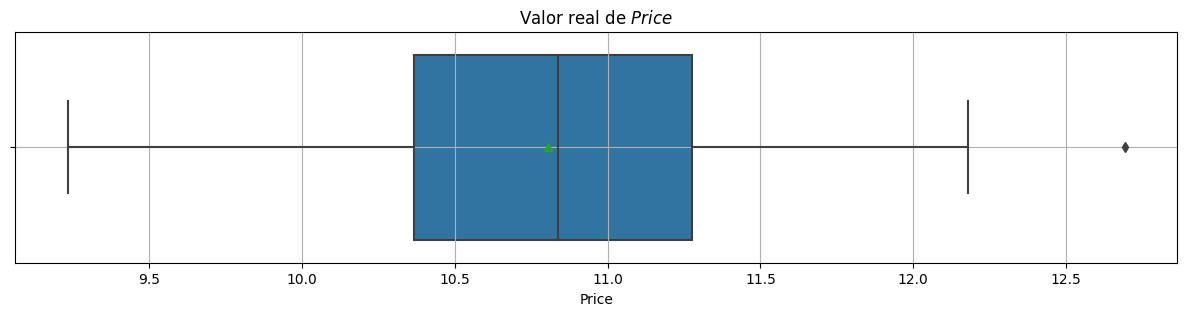

In [392]:
plt.figure(figsize = (15, 3))
sns.boxplot(x = y_test, showmeans = True, orient = 'h')
plt.title('Valor real de $\t{Price}$')
plt.grid()
plt.show()

In [393]:
y_test.describe()

count    350.000000
mean      10.804261
std        0.630664
min        9.232535
25%       10.367478
50%       10.836211
75%       11.274344
max       12.691441
Name: Price, dtype: float64

/Users/duman/.pyenv/versions/3.9.0/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

  if pd.api.types.is_categorical_dtype(vector):


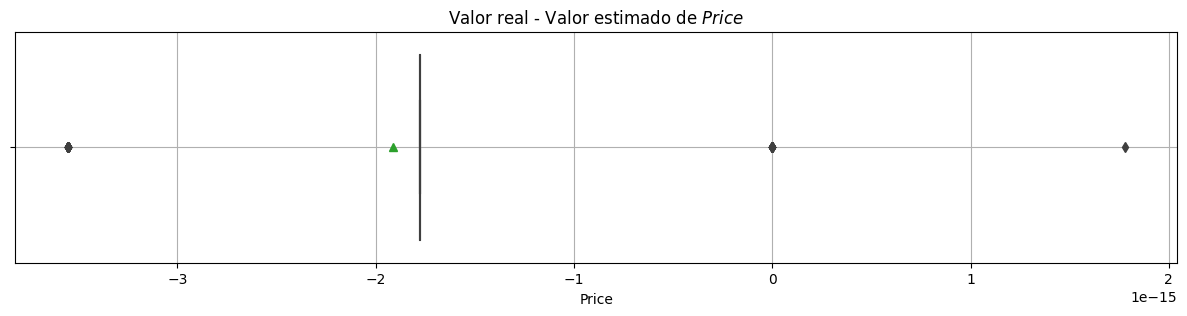

In [395]:
plt.figure(figsize = (15, 3))
sns.boxplot(x = (y_test - regression.predict(X_test)), showmeans = True, orient = 'h')
plt.title('Valor real - Valor estimado de $\t{Price}$')
plt.grid()
plt.show()

In [396]:
abs(y_test - regression.predict(X_test)).describe()

count    3.500000e+02
mean     1.923541e-15
std      7.523064e-16
min      0.000000e+00
25%      1.776357e-15
50%      1.776357e-15
75%      1.776357e-15
max      3.552714e-15
Name: Price, dtype: float64